# Create a log-normal mock dark-matter distribution

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In this demo, we create a mock dark-matter distribution, based on the cosmological power spectrum. To generate the power-spectrum we use the ``hmf`` code (https://github.com/steven-murray/hmf).

The box can be set up like this:

In [5]:
from hmf import MassFunction
from scipy.interpolate import InterpolatedUnivariateSpline as spline
import numpy as np
from powerbox import LogNormalPowerBox

# Set up a MassFunction instance to access its cosmological power-spectrum
mf = MassFunction(z=0)

# Generate a callable function that returns the cosmological power spectrum.
spl = spline(np.log(mf.k),np.log(mf.power),k=2)
power = lambda k : np.exp(spl(np.log(k)))

# Create the power-box instance. The boxlength is in inverse units of the k of which pk is a function, i.e.
# Mpc/h in this case.
pb = LogNormalPowerBox(N=256, dim=3, pk = power, boxlength= 100.)

Now we can make a plot of a slice of the density field:

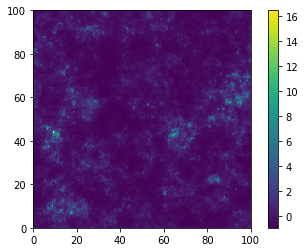

In [6]:
plt.imshow(np.mean(pb.delta_x[:100,:,:],axis=0),extent=(0,100,0,100))
plt.colorbar()
plt.show()

And we can also compare the power-spectrum of the output field to the input power:

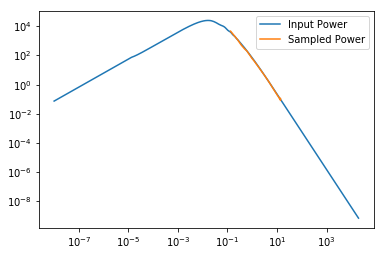

In [7]:
from powerbox import get_power

p_k, kbins = get_power(pb.delta_x,pb.boxlength)
plt.plot(mf.k,mf.power,label="Input Power")
plt.plot(kbins,p_k,label="Sampled Power")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

Furthermore, we can sample a set of discrete particles on the field and plot them:

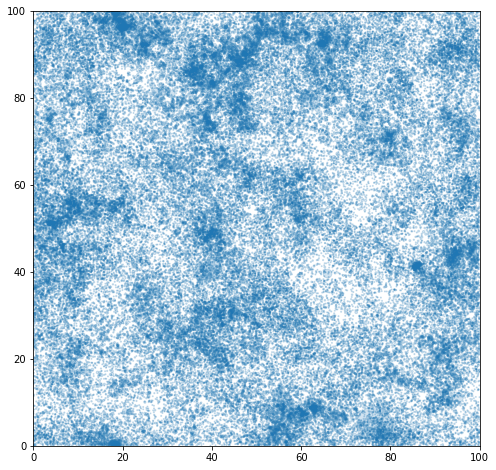

In [10]:
particles = pb.create_discrete_sample(nbar=0.1,min_at_zero=True)

plt.figure(figsize=(8,8))
plt.scatter(particles[:,0],particles[:,1],s=np.sqrt(100./particles[:,2]),alpha=0.2)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

Or plot them in 3D!

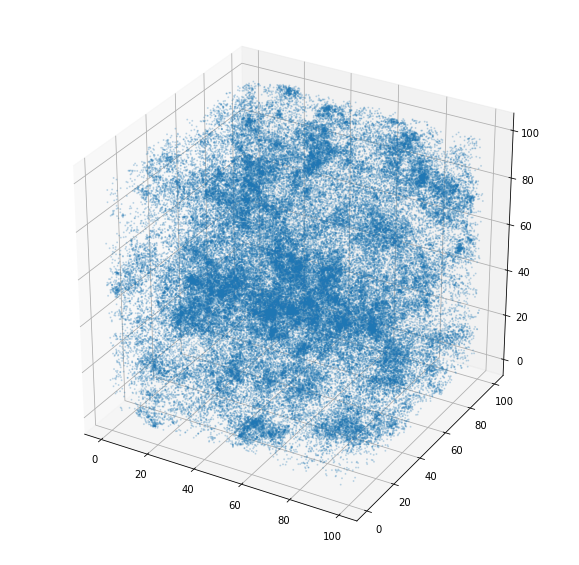

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(particles[:,0], particles[:,1], particles[:,2],s=1,alpha=0.2)
plt.show()

Then check that the power-spectrum of the sample matches the input:

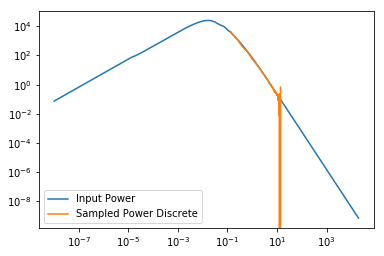

In [19]:
p_k_sample, kbins_sample = get_power(particles, pb.boxlength,N=pb.N)

plt.plot(mf.k,mf.power,label="Input Power")
plt.plot(kbins_sample,p_k_sample,label="Sampled Power Discrete")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()